3.	Analyze the information given in the following ‘Insurance Policy dataset’ 
create clusters of persons falling in the same type. Refer to Insurance Dataset.csv

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [64]:
df=pd.read_csv("Insurance Dataset.csv")

In [65]:
df.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


In [66]:
df.shape

(100, 5)

In [67]:
df.isna().sum()

Premiums Paid    0
Age              0
Days to Renew    0
Claims made      0
Income           0
dtype: int64

In [68]:
df.columns

Index(['Premiums Paid', 'Age', 'Days to Renew', 'Claims made', 'Income'], dtype='object')

In [69]:
duplicate=df.duplicated()
duplicate
sum(duplicate)

0

In [70]:
df.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


array([[<Axes: title={'center': 'Premiums Paid'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Days to Renew'}>,
        <Axes: title={'center': 'Claims made'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >]], dtype=object)

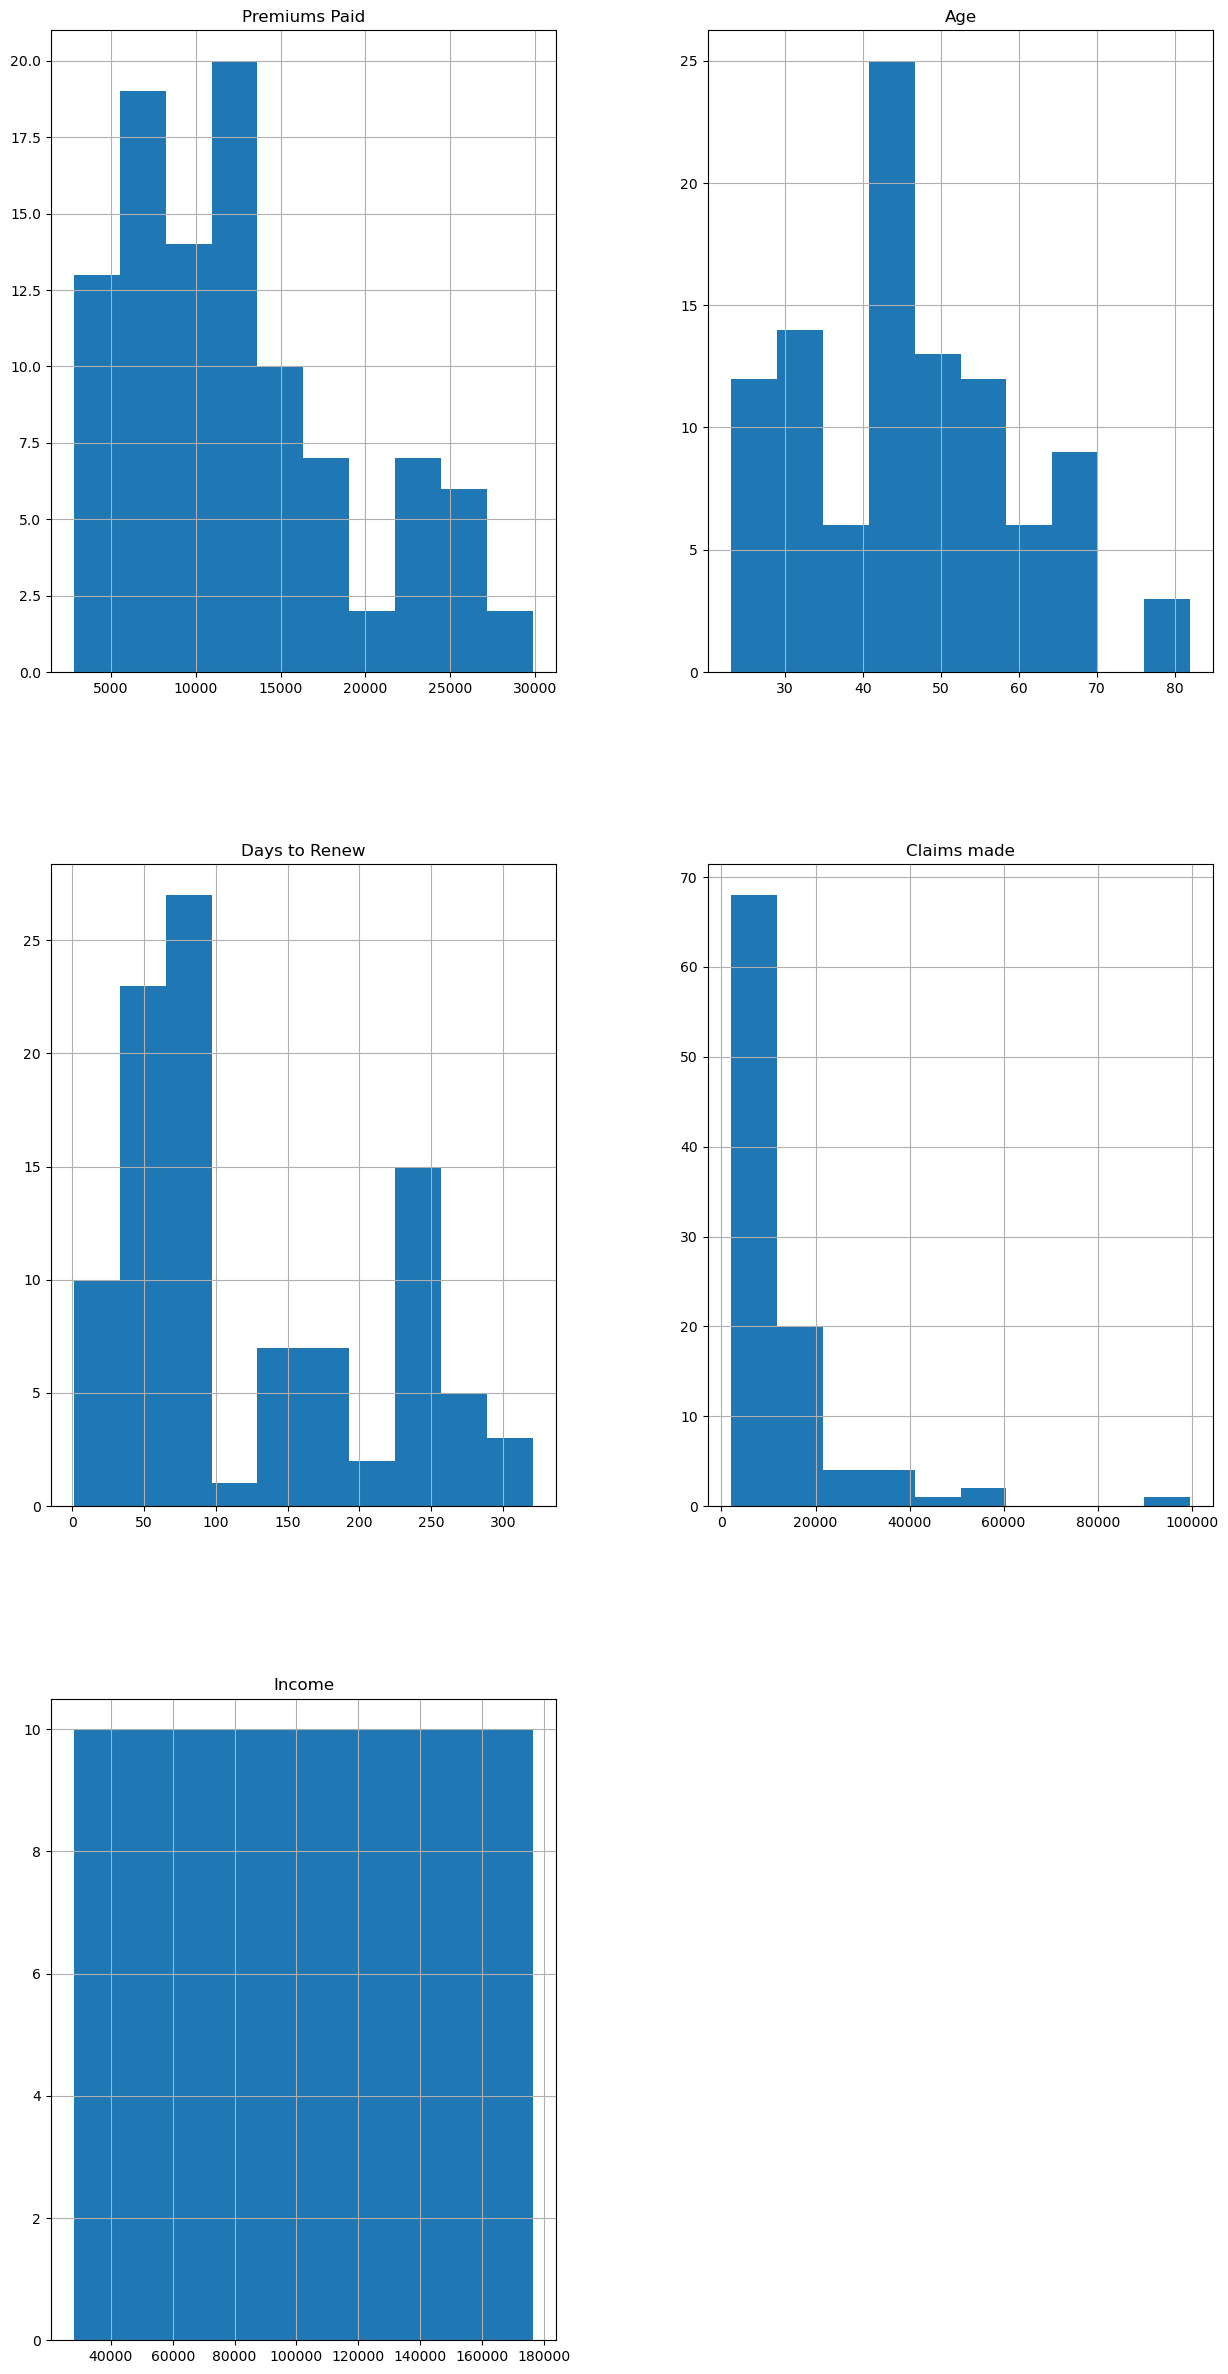

In [71]:
df.hist(figsize=(15,30))

C:\Users\viren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\viren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Income', ylabel='Count'>

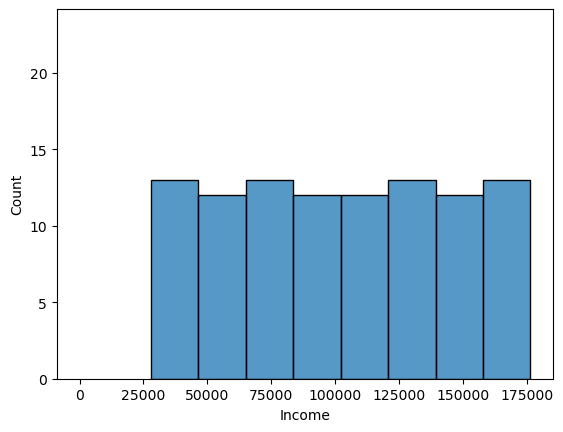

In [57]:
sns.histplot(df["Income"])
sns.histplot(df["Age"])

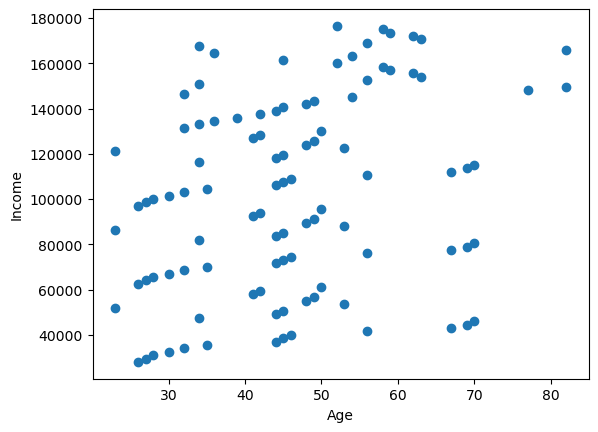

In [40]:
plt.scatter(df["Age"],df["Income"])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [72]:
df['Premiums Paid'] = np.log1p(df['Premiums Paid'])

In [73]:
df['Claims made'] = np.log1p(df['Claims made'])

# Normalization function
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return x

In [76]:
#df_norm = norm_func(df)

#we can use this onn whole data but we are not using whokle for clustering

so we are not usoinng function laso

In [80]:
scaler = MinMaxScaler()
X = df[['Premiums Paid', 'Income', 'Claims made']]
X_scaled = scaler.fit_transform(X)

In [81]:
df_norm.head()

,Age,Days to Renew,Claims made,Income
0,0.094926,0.937177,0.172474,0.000000
1,0.124236,0.823011,0.037814,0.028344
2,0.152518,0.842993,0.066199,0.055282
3,0.206267,0.688099,0.000000,0.080947
4,0.256655,0.659248,0.003944,0.105454


In [82]:
# Apply MinMaxScaler after log transformation
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

In [83]:
# Determine the number of clusters
TWSS = []
k = list(range(1, 9))
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)

C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

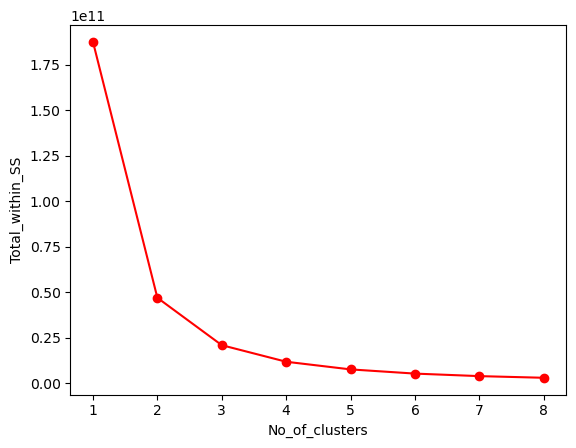

In [84]:
# Plot the Elbow curve to determine optimal clusters
plt.plot(k, TWSS, 'ro-')
plt.xlabel("No_of_clusters")
plt.ylabel("Total_within_SS")
plt.show()

In [85]:
# From the elbow curve, we find that the optimal number of clusters is 3
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age", "Income"]])
df["cluster"] = y_predicted

C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [86]:
# Visualize the clusters (Age vs Income)
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

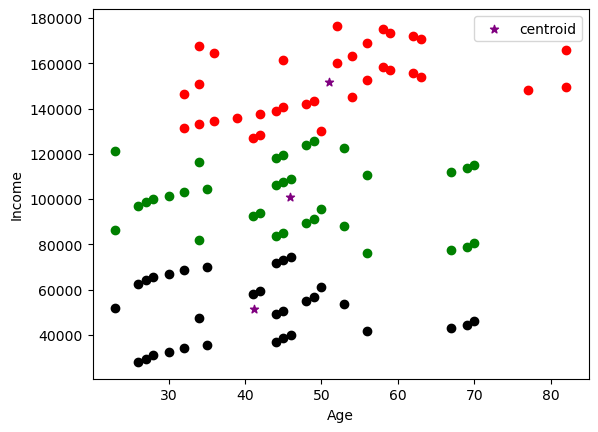

In [87]:
plt.scatter(df1.Age, df1["Income"], color="green")
plt.scatter(df2.Age, df2["Income"], color="red")
plt.scatter(df3.Age, df3["Income"], color="black")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [88]:
# Now for clustering based on Age and Claims made
y_predicted = km.fit_predict(df[["Age", "Claims made"]])
df["cluster"] = y_predicted

C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [89]:
# Visualize the clusters (Age vs Claims made)
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

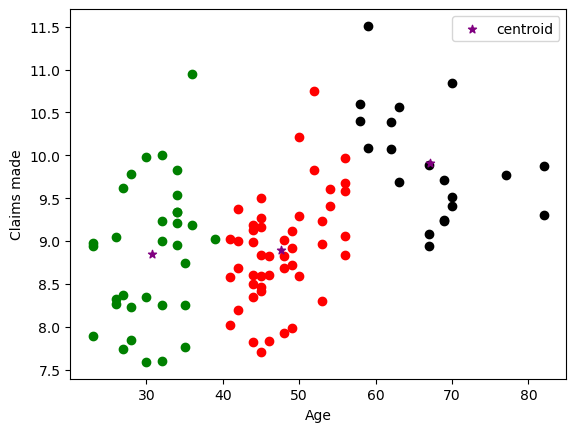

In [90]:

plt.scatter(df1.Age, df1["Claims made"], color="green")
plt.scatter(df2.Age, df2["Claims made"], color="red")
plt.scatter(df3.Age, df3["Claims made"], color="black")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Claims made')
plt.legend()
plt.show()